In [102]:
import gzip
import urllib
import re
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from sklearn.metrics import classification_report, confusion_matrix

np.set_printoptions(edgeitems=np.inf)

from tensorflow.compat.v1.keras.backend import set_session
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
config.log_device_placement = True
sess = tf.compat.v1.Session(config=config)
set_session(sess)

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: GeForce RTX 2060, pci bus id: 0000:01:00.0, compute capability: 7.5
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device



In [103]:
import urllib
import os
if not os.path.isfile('../data/8_faces_train_and_valid.hdf5'):
    urllib.request.urlretrieve("https://www.dropbox.com/s/dx03vk6dmbtoywn/8_faces_train_and_valid.hdf5?dl=1","../data/8_faces_train_and_valid.hdf5")
!ls -l ../data/8_faces_train_and_valid.hdf5

-rw-r--r-- 1 henning henning 132733792 Jan  8 23:55 ../data/8_faces_train_and_valid.hdf5


In [104]:
import h5py
h5f_X = h5py.File('../data/8_faces_train_and_valid.hdf5', 'r')
print(list(h5f_X.keys()))
X_train = h5f_X['X_train_8_faces'][()]
print(X_train.shape)
Y_train = h5f_X['Y_train_8_faces'][()]
print(Y_train.shape)
X_valid = h5f_X['X_valid_8_faces'][()]
print(X_valid.shape)
Y_valid = h5f_X['Y_valid_8_faces'][()]
print(Y_valid.shape, X_valid.dtype)

['X_train_8_faces', 'X_valid_8_faces', 'Y_train_8_faces', 'Y_valid_8_faces']
(2000, 48, 48, 3)
(2000,)
(400, 48, 48, 3)
(400,) float64


250


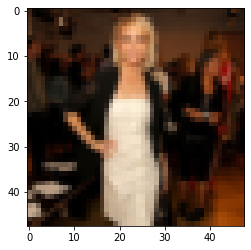

In [105]:
n = 0 #Miranda Cosgrove
n = 1 #Chris Martin (singer)
n = 2 #Emma Stone (actress)
n = 3 #Jamie Foxx (actor)
n = 4 #Steve Jobs (entrepreneur)
n = 5 #Zac Efron (actor)
n = 6 #Sandra Oh (actress)
n = 7 #Taryn Manning (actress)
classes = ["Miranda Cosgrove", "Chris Martin", "Emma Stone", "Jamie Foxx", 
           "Steve Jobs", "Zac Efron", "Sandra Oh", "Taryn Manning"]
idx=np.reshape(np.where(Y_train[0:len(Y_train)]==n), (250))
print(len(Y_train[idx]))
plt.imshow(np.asarray(X_train[idx][0], dtype="uint8"))

In [106]:
#Downloading the data, if it does not exist
if not os.path.isfile('../data/8_faces_test.hdf5'):
  urllib.request.urlretrieve("https://www.dropbox.com/s/ugxrdo0lpc2ixvr/8_faces_test.hdf5?dl=1","../data/8_faces_test.hdf5")
h5f_X = h5py.File('../data/8_faces_test.hdf5', 'r')
print(list(h5f_X.keys()))
X_test = h5f_X['X_test_8_faces'][()]
print(X_test.shape)
Y_test = h5f_X['Y_test_8_faces'][()]
print(Y_test.shape)

['X_test_8_faces', 'Y_test_8_faces']
(400, 48, 48, 3)
(400,)


In [107]:
np.min(X_train), np.max(X_train), np.min(X_test), np.max(X_test)
X_train /= 255
X_valid /= 255
X_test /= 255

## a)

In [108]:
n_epochs = 50
batch_size = 16
lr = 1e-4

model = Sequential()
model.add(Conv2D(15, kernel_size=3, strides=1, input_shape=(48, 48, 3), padding='same'))
model.add(Activation("relu"))
model.add(Conv2D(15, kernel_size=3, strides=1, padding='same'))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=2, strides=2, padding='same'))

model.add(Conv2D(30, kernel_size=3, strides=1, padding='same'))
model.add(Activation("relu"))
model.add(Conv2D(30, kernel_size=3, strides=1, padding='same'))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=4, strides=4))

model.add(Flatten())
model.add(Dense(300))
model.add(Activation("relu"))
model.add(Dense(8, activation="softmax"))

model.compile(optimizer="adam", loss='categorical_crossentropy', lr=lr, metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 48, 48, 15)        420       
_________________________________________________________________
activation_20 (Activation)   (None, 48, 48, 15)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 48, 48, 15)        2040      
_________________________________________________________________
activation_21 (Activation)   (None, 48, 48, 15)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 24, 24, 15)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 24, 24, 30)        4080      
_________________________________________________________________
activation_22 (Activation)   (None, 24, 24, 30)       

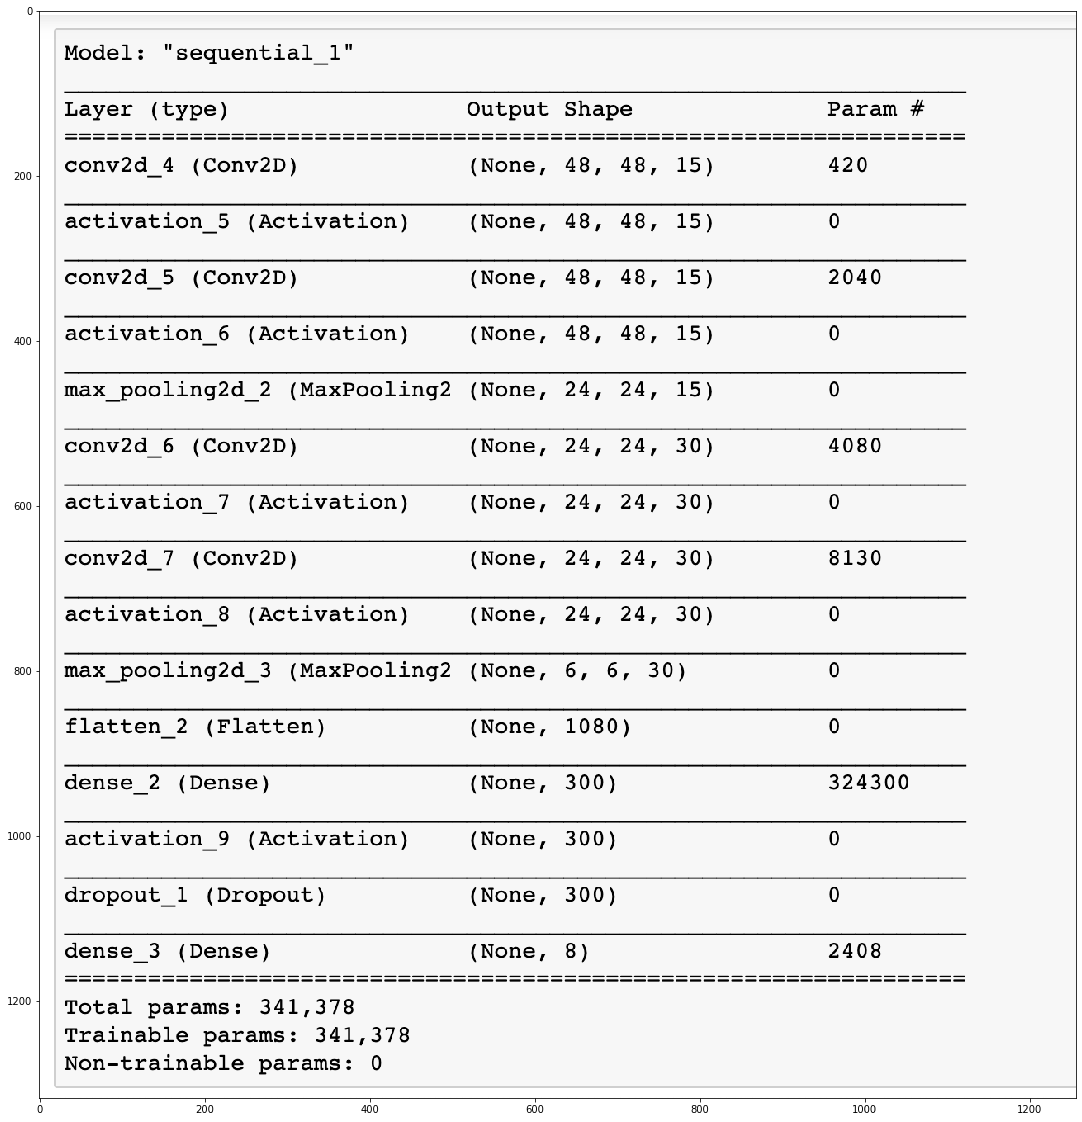

In [109]:
img = plt.imread("https://raw.githubusercontent.com/ioskn/mldl_htwg/master/uebungen/dl_cnn_faces_net.png")
plt.figure(figsize = (20, 20))
plt.imshow(img)
plt.show()

In [110]:
x0 = X_train
y0 = to_categorical(Y_train)

x2 = X_valid
y2 = to_categorical(Y_valid)

history = model.fit(x0, y0, batch_size=batch_size, epochs=n_epochs, validation_data=(x2, y2));

Train on 2000 samples, validate on 400 samples
Epoch 1/50
2000/2000 [==============================] - 2s 795us/sample - loss: 1.8988 - accuracy: 0.2610 - val_loss: 1.7124 - val_accuracy: 0.3525
Epoch 2/50
2000/2000 [==============================] - 1s 266us/sample - loss: 1.5359 - accuracy: 0.4450 - val_loss: 1.4521 - val_accuracy: 0.4600
Epoch 3/50
2000/2000 [==============================] - 1s 272us/sample - loss: 1.2920 - accuracy: 0.5355 - val_loss: 1.3748 - val_accuracy: 0.4925
Epoch 4/50
2000/2000 [==============================] - 1s 320us/sample - loss: 1.0423 - accuracy: 0.6410 - val_loss: 1.2953 - val_accuracy: 0.5600
Epoch 5/50
2000/2000 [==============================] - 1s 271us/sample - loss: 0.7991 - accuracy: 0.7310 - val_loss: 1.2978 - val_accuracy: 0.5600
Epoch 6/50
2000/2000 [==============================] - 1s 292us/sample - loss: 0.5796 - accuracy: 0.8040 - val_loss: 1.4387 - val_accuracy: 0.5825
Epoch 7/50
2000/2000 [==============================] - 1s 280us/

In [111]:
score_train = model.evaluate(x0, y0, verbose=0)
print("Loss train set: {}".format(score_train[0]))
print("Accuracy train set: {}".format(score_train[1]))
print()
score_val = model.evaluate(x2, y2, verbose=0)
print("Loss validation set: {}".format(score_val[0]))
print("Accuracy validation set: {}".format(score_val[1]))
print()

Loss train set: 9.021983587444992e-06
Accuracy train set: 1.0

Loss validation set: 3.833002269268036
Accuracy validation set: 0.6575000286102295



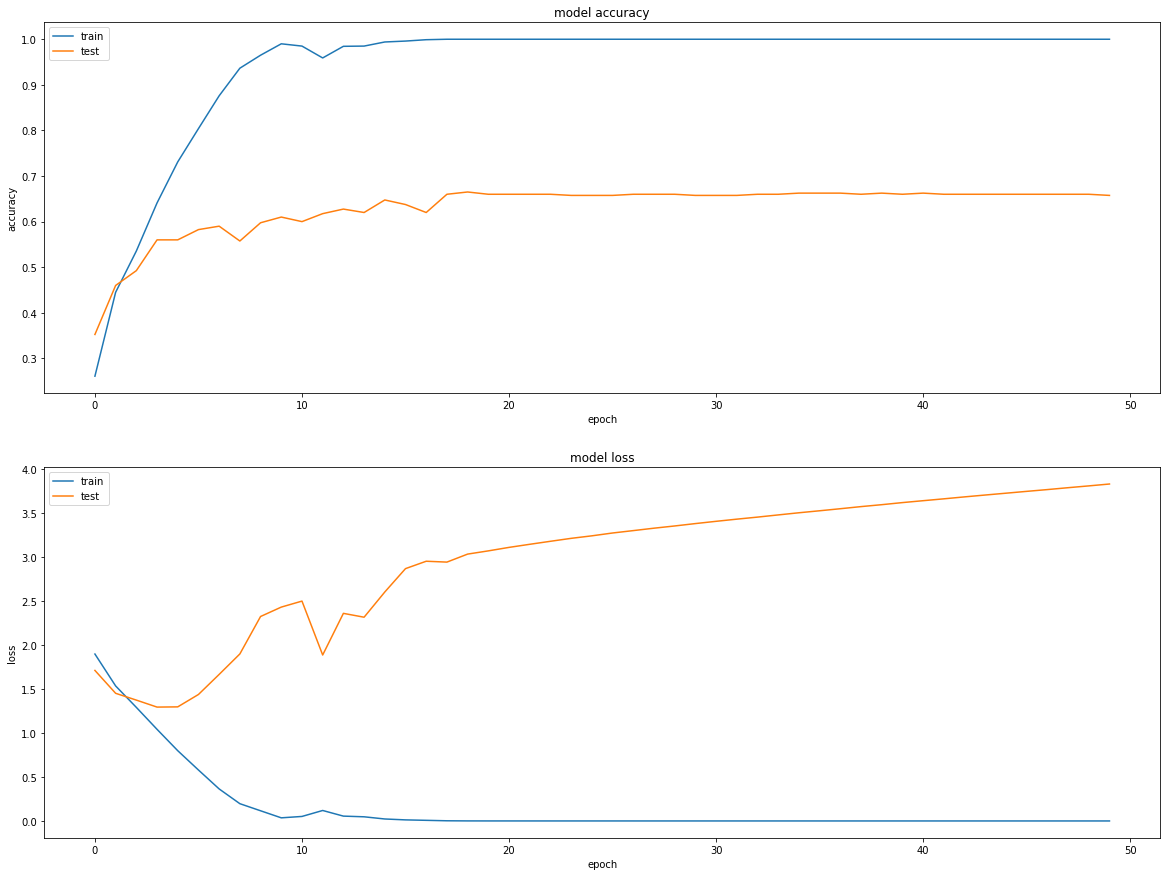

In [112]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 15))

axes[0].plot(history.history['accuracy'])
axes[0].plot(history.history['val_accuracy'])
axes[0].set_title('model accuracy')
axes[0].set_ylabel('accuracy')
axes[0].set_xlabel('epoch')
axes[0].legend(['train', 'test'], loc='upper left')

axes[1].plot(history.history['loss'])
axes[1].plot(history.history['val_loss'])
axes[1].set_title('model loss')
axes[1].set_ylabel('loss')
axes[1].set_xlabel('epoch')
axes[1].legend(['train', 'test'], loc='upper left');

In [113]:
y_pred = model.predict(x2).argmax(axis=1)
y2_tmp = y2.argmax(axis=1)
matrix = confusion_matrix(y2_tmp, y_pred)
print('Confusion matrix')
print(matrix)

Confusion matrix
[[42  2  3  0  0  0  1  2]
 [ 0 20  3  7  3 10  2  5]
 [ 2  1 36  1  0  3  1  6]
 [ 1  4  4 32  0  6  2  1]
 [ 0  6  1  2 40  0  0  1]
 [ 2  5  2  2  2 33  3  1]
 [ 7  1  1  1  1  3 33  3]
 [ 5  5  5  0  2  3  3 27]]


In [114]:
print('Classification Report')
print(classification_report(y2_tmp, y_pred, target_names=classes))

Classification Report
                  precision    recall  f1-score   support

Miranda Cosgrove       0.71      0.84      0.77        50
    Chris Martin       0.45      0.40      0.43        50
      Emma Stone       0.65      0.72      0.69        50
      Jamie Foxx       0.71      0.64      0.67        50
      Steve Jobs       0.83      0.80      0.82        50
       Zac Efron       0.57      0.66      0.61        50
       Sandra Oh       0.73      0.66      0.69        50
   Taryn Manning       0.59      0.54      0.56        50

        accuracy                           0.66       400
       macro avg       0.66      0.66      0.66       400
    weighted avg       0.66      0.66      0.66       400



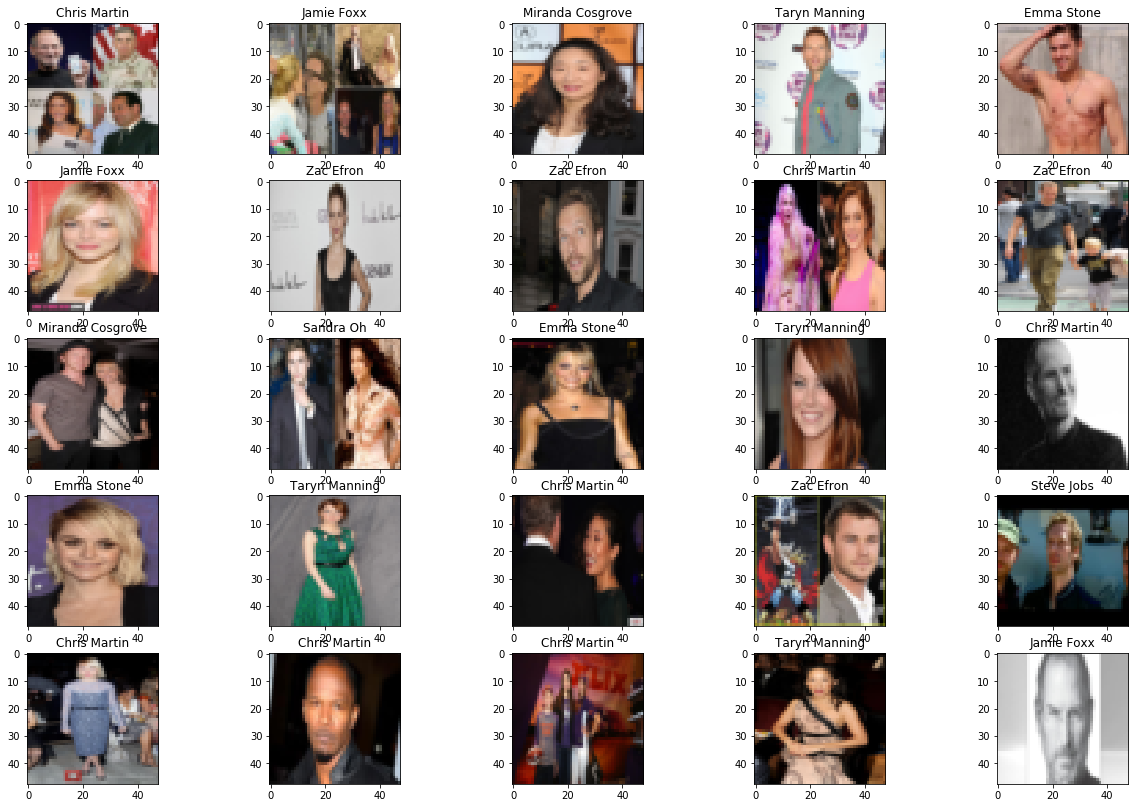

In [115]:
indices = (~(y_pred == y2_tmp)).nonzero()[0]
count = 0
nrows, ncols = 5, 5
fig, axes = plt.subplots(nrows, ncols, figsize=(21, 14))
for i in range(nrows):
    for j in range(nrows):
        img = x2[indices[count]]
        axes[i, j].imshow(img)
        axes[i, j].set_title(classes[y_pred[indices[count]]])
        count += 1

## b)

In [116]:
from tensorflow.keras.applications import VGG16
img_height = img_width = 48
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0     

In [117]:
fc1 = base_model.output
fc1 = Flatten()(fc1)

fc1 = Dense(512, activation='relu', name='my_dense1')(fc1)
fc2 = Dense(512, activation='relu', name='my_dense2')(fc1)
fc3 = Dense(100, activation='relu', name='my_dense3')(fc2)
fc4 = Dense(8, activation='softmax', name='my_dense4')(fc3)

model_trans = tf.compat.v1.keras.Model(base_model.input, fc4)
model_trans.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0   

In [118]:
for layer in model_trans.layers:
    if layer.name.startswith('my_dense'):
        layer.trainable = True
        print(f"Set {layer.name} to trainable.")
    else:
        layer.trainable = False
print()
model_trans.summary()

Set my_dense1 to trainable.
Set my_dense2 to trainable.
Set my_dense3 to trainable.
Set my_dense4 to trainable.

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
____________

In [119]:
x0 = X_train
y0 = to_categorical(Y_train)

x2 = X_valid
y2 = to_categorical(Y_valid)

model_trans.compile(optimizer="adam", loss='categorical_crossentropy', lr=lr, metrics=['accuracy'])
history = model_trans.fit(x0, y0, batch_size=batch_size, epochs=n_epochs, validation_data=(x2, y2));

Train on 2000 samples, validate on 400 samples
Epoch 1/50
2000/2000 [==============================] - 2s 1ms/sample - loss: 1.7520 - accuracy: 0.3540 - val_loss: 1.4672 - val_accuracy: 0.4525
Epoch 2/50
2000/2000 [==============================] - 1s 719us/sample - loss: 1.2642 - accuracy: 0.5515 - val_loss: 1.2903 - val_accuracy: 0.5675
Epoch 3/50
2000/2000 [==============================] - 1s 699us/sample - loss: 1.0346 - accuracy: 0.6250 - val_loss: 1.3446 - val_accuracy: 0.5150
Epoch 4/50
2000/2000 [==============================] - 1s 738us/sample - loss: 0.8416 - accuracy: 0.6970 - val_loss: 1.3055 - val_accuracy: 0.5500
Epoch 5/50
2000/2000 [==============================] - 1s 733us/sample - loss: 0.6784 - accuracy: 0.7570 - val_loss: 1.4046 - val_accuracy: 0.5475
Epoch 6/50
2000/2000 [==============================] - 1s 725us/sample - loss: 0.5083 - accuracy: 0.8235 - val_loss: 1.5111 - val_accuracy: 0.5550
Epoch 7/50
2000/2000 [==============================] - 1s 706us/sa

In [120]:
score_train = model_trans.evaluate(x0, y0, verbose=0)
print("Loss train set: {}".format(score_train[0]))
print("Accuracy train set: {}".format(score_train[1]))
print()
score_val = model_trans.evaluate(x2, y2, verbose=0)
print("Loss validation set: {}".format(score_val[0]))
print("Accuracy validation set: {}".format(score_val[1]))
print()

Loss train set: 7.099296803062316e-06
Accuracy train set: 1.0

Loss validation set: 3.9098423767089843
Accuracy validation set: 0.6150000095367432



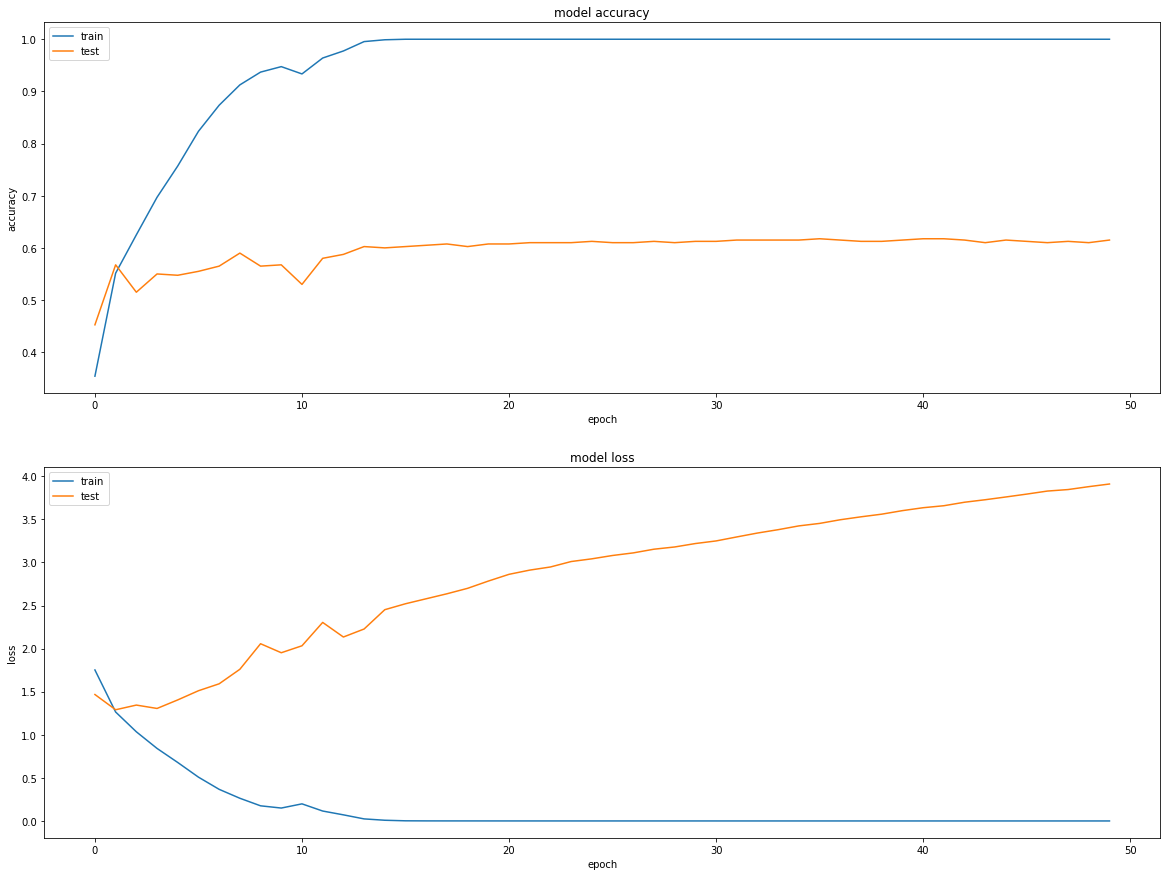

In [121]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 15))

axes[0].plot(history.history['accuracy'])
axes[0].plot(history.history['val_accuracy'])
axes[0].set_title('model accuracy')
axes[0].set_ylabel('accuracy')
axes[0].set_xlabel('epoch')
axes[0].legend(['train', 'test'], loc='upper left')

axes[1].plot(history.history['loss'])
axes[1].plot(history.history['val_loss'])
axes[1].set_title('model loss')
axes[1].set_ylabel('loss')
axes[1].set_xlabel('epoch')
axes[1].legend(['train', 'test'], loc='upper left');

In [122]:
y_pred = model_trans.predict(x2).argmax(axis=1)
y2_tmp = y2.argmax(axis=1)
matrix = confusion_matrix(y2_tmp, y_pred)
print('Confusion matrix')
print(matrix)

Confusion matrix
[[38  2  3  1  1  2  3  0]
 [ 4 19  1  7  5  5  6  3]
 [ 2  4 33  1  0  3  1  6]
 [ 2  7  1 30  3  4  2  1]
 [ 1  5  2  0 39  1  2  0]
 [ 1  4  1  5  1 32  3  3]
 [ 3  5  2  3  1  1 28  7]
 [ 6  5  3  2  0  2  5 27]]


In [123]:
print('Classification Report')
print(classification_report(y2_tmp, y_pred, target_names=classes))

Classification Report
                  precision    recall  f1-score   support

Miranda Cosgrove       0.67      0.76      0.71        50
    Chris Martin       0.37      0.38      0.38        50
      Emma Stone       0.72      0.66      0.69        50
      Jamie Foxx       0.61      0.60      0.61        50
      Steve Jobs       0.78      0.78      0.78        50
       Zac Efron       0.64      0.64      0.64        50
       Sandra Oh       0.56      0.56      0.56        50
   Taryn Manning       0.57      0.54      0.56        50

        accuracy                           0.61       400
       macro avg       0.62      0.61      0.61       400
    weighted avg       0.62      0.61      0.61       400



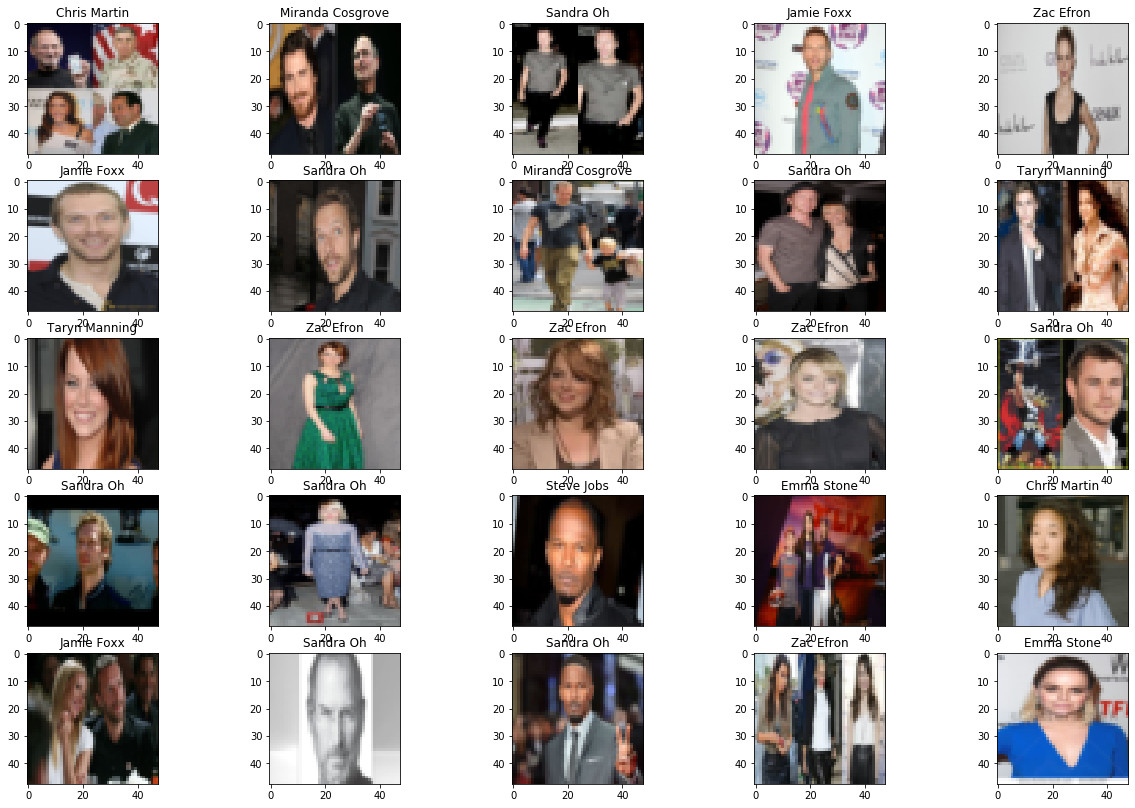

In [124]:
indices = (~(y_pred == y2_tmp)).nonzero()[0]
count = 0
nrows, ncols = 5, 5
fig, axes = plt.subplots(nrows, ncols, figsize=(21, 14))
for i in range(nrows):
    for j in range(nrows):
        img = x2[indices[count]]
        axes[i, j].imshow(img)
        axes[i, j].set_title(classes[y_pred[indices[count]]])
        count += 1

## c)

In [125]:
from tensorflow.keras.applications import VGG16
img_height = img_width = 48
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 48, 48, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0     

In [126]:
pattern1 = re.compile("block[1-2]_conv2")
pattern2 = re.compile("block[3-5]_conv3")
new_model = Sequential()

dropout1 = 0.1
dropout2 = 0.25
dropout3 = 0.5
count1 = 1
count2 = 1

for layer in base_model.layers:
    layer.trainable = False
    new_model.add(layer)
    
    if re.match(pattern1, layer.name):
        new_layer = Dropout(dropout1, name=f"dropout{count1}_{dropout1}")
        new_layer.trainable = True
        new_model.add(new_layer)
        count1 += 1
        
    if re.match(pattern2, layer.name):
        new_layer = Dropout(dropout2, name=f"dropout{count2}_{dropout2}")
        new_layer.trainable = True
        new_model.add(new_layer)
        count2 += 1

new_model.add(Flatten())
new_model.add(Dense(512, activation='relu', name='my_dense1', trainable=True))        
new_model.add(Dropout(dropout3, name=f"dropout{1}_{dropout3}"))
new_model.add(Dense(512, activation='relu', name='my_dense2', trainable=True))        
new_model.add(Dropout(dropout3, name=f"dropout{2}_{dropout3}"))
new_model.add(Dense(100, activation='relu', name='my_dense3', trainable=True)) 
new_model.add(Dropout(dropout3, name=f"dropout{3}_{dropout3}"))
new_model.add(Dense(8, activation='softmax', name='my_dense4', trainable=True)) 

new_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
dropout1_0.1 (Dropout)       (None, 48, 48, 64)        0         
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
dropout2_0.1 (Dropout)       (None, 24, 24, 128)      

In [127]:
x0 = X_train
y0 = to_categorical(Y_train)

x2 = X_valid
y2 = to_categorical(Y_valid)

new_model.compile(optimizer="adam", loss='categorical_crossentropy', lr=lr, metrics=['accuracy'])
history = new_model.fit(x0, y0, batch_size=batch_size, epochs=n_epochs, validation_data=(x2, y2));

Train on 2000 samples, validate on 400 samples
Epoch 1/50
2000/2000 [==============================] - 3s 1ms/sample - loss: 2.1762 - accuracy: 0.1550 - val_loss: 2.0022 - val_accuracy: 0.3125
Epoch 2/50
2000/2000 [==============================] - 2s 779us/sample - loss: 1.9459 - accuracy: 0.2565 - val_loss: 1.8591 - val_accuracy: 0.3250
Epoch 3/50
2000/2000 [==============================] - 2s 786us/sample - loss: 1.8286 - accuracy: 0.3230 - val_loss: 1.7464 - val_accuracy: 0.4100
Epoch 4/50
2000/2000 [==============================] - 2s 773us/sample - loss: 1.7003 - accuracy: 0.3555 - val_loss: 1.7209 - val_accuracy: 0.3750
Epoch 5/50
2000/2000 [==============================] - 2s 774us/sample - loss: 1.6373 - accuracy: 0.3865 - val_loss: 1.6839 - val_accuracy: 0.4425
Epoch 6/50
2000/2000 [==============================] - 2s 803us/sample - loss: 1.5657 - accuracy: 0.4290 - val_loss: 1.6063 - val_accuracy: 0.4700
Epoch 7/50
2000/2000 [==============================] - 1s 749us/sa

In [128]:
score_train = new_model.evaluate(x0, y0, verbose=0)
print("Loss train set: {}".format(score_train[0]))
print("Accuracy train set: {}".format(score_train[1]))
print()
score_val = new_model.evaluate(x2, y2, verbose=0)
print("Loss validation set: {}".format(score_val[0]))
print("Accuracy validation set: {}".format(score_val[1]))
print()

Loss train set: 0.46732664108276367
Accuracy train set: 0.9355000257492065

Loss validation set: 1.2975984477996827
Accuracy validation set: 0.5575000047683716



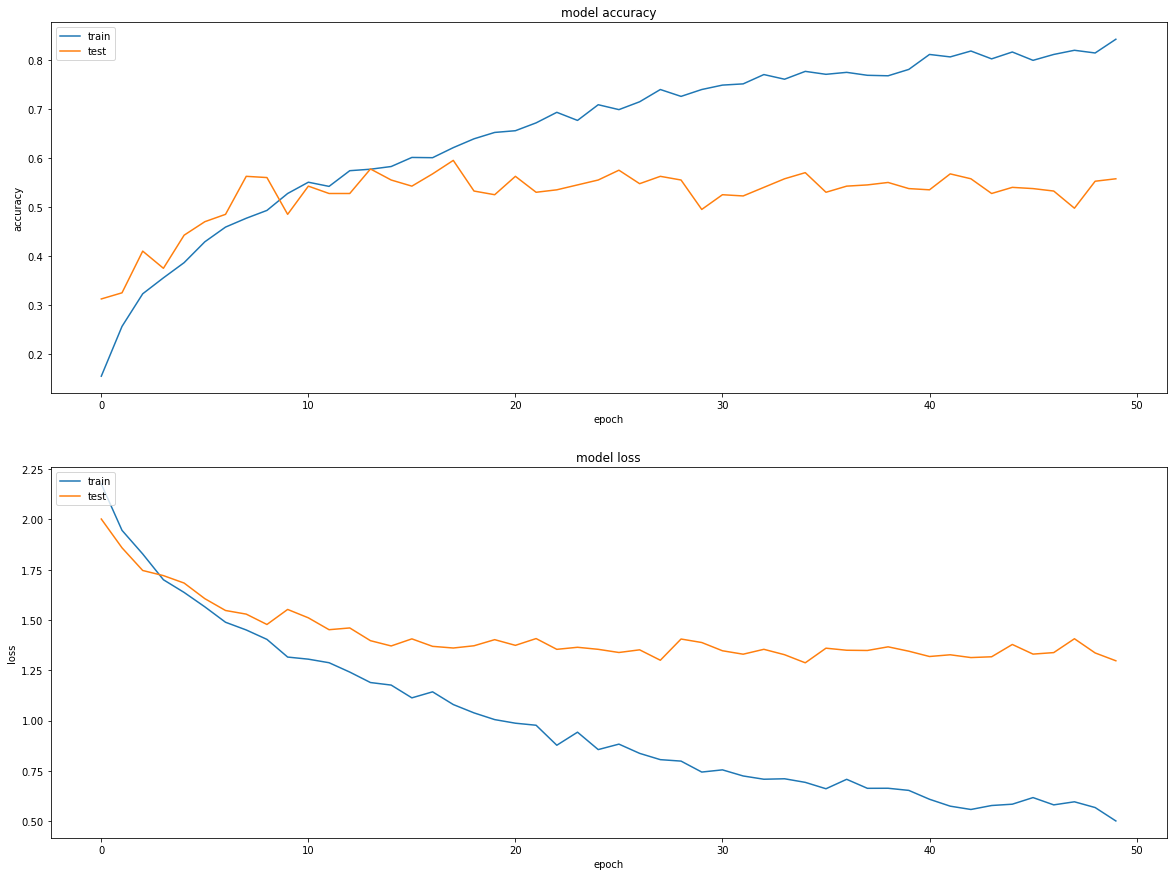

In [129]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 15))

axes[0].plot(history.history['accuracy'])
axes[0].plot(history.history['val_accuracy'])
axes[0].set_title('model accuracy')
axes[0].set_ylabel('accuracy')
axes[0].set_xlabel('epoch')
axes[0].legend(['train', 'test'], loc='upper left')

axes[1].plot(history.history['loss'])
axes[1].plot(history.history['val_loss'])
axes[1].set_title('model loss')
axes[1].set_ylabel('loss')
axes[1].set_xlabel('epoch')
axes[1].legend(['train', 'test'], loc='upper left');

In [130]:
y_pred = new_model.predict(x2).argmax(axis=1)
y2_tmp = y2.argmax(axis=1)
matrix = confusion_matrix(y2_tmp, y_pred)
print('Confusion matrix')
print(matrix)

Confusion matrix
[[31  0  5  0  0  3  9  2]
 [ 5 19  2  4  2  6  7  5]
 [ 3  2 33  1  0  1  2  8]
 [ 2  6  0 28  0  7  5  2]
 [ 0 15  2  1 24  2  5  1]
 [ 1  3  5  4  0 28  5  4]
 [ 7  1  2  3  0  1 26 10]
 [ 4  2  2  1  0  2  5 34]]


In [131]:
print('Classification Report')
print(classification_report(y2_tmp, y_pred, target_names=classes))

Classification Report
                  precision    recall  f1-score   support

Miranda Cosgrove       0.58      0.62      0.60        50
    Chris Martin       0.40      0.38      0.39        50
      Emma Stone       0.65      0.66      0.65        50
      Jamie Foxx       0.67      0.56      0.61        50
      Steve Jobs       0.92      0.48      0.63        50
       Zac Efron       0.56      0.56      0.56        50
       Sandra Oh       0.41      0.52      0.46        50
   Taryn Manning       0.52      0.68      0.59        50

        accuracy                           0.56       400
       macro avg       0.59      0.56      0.56       400
    weighted avg       0.59      0.56      0.56       400



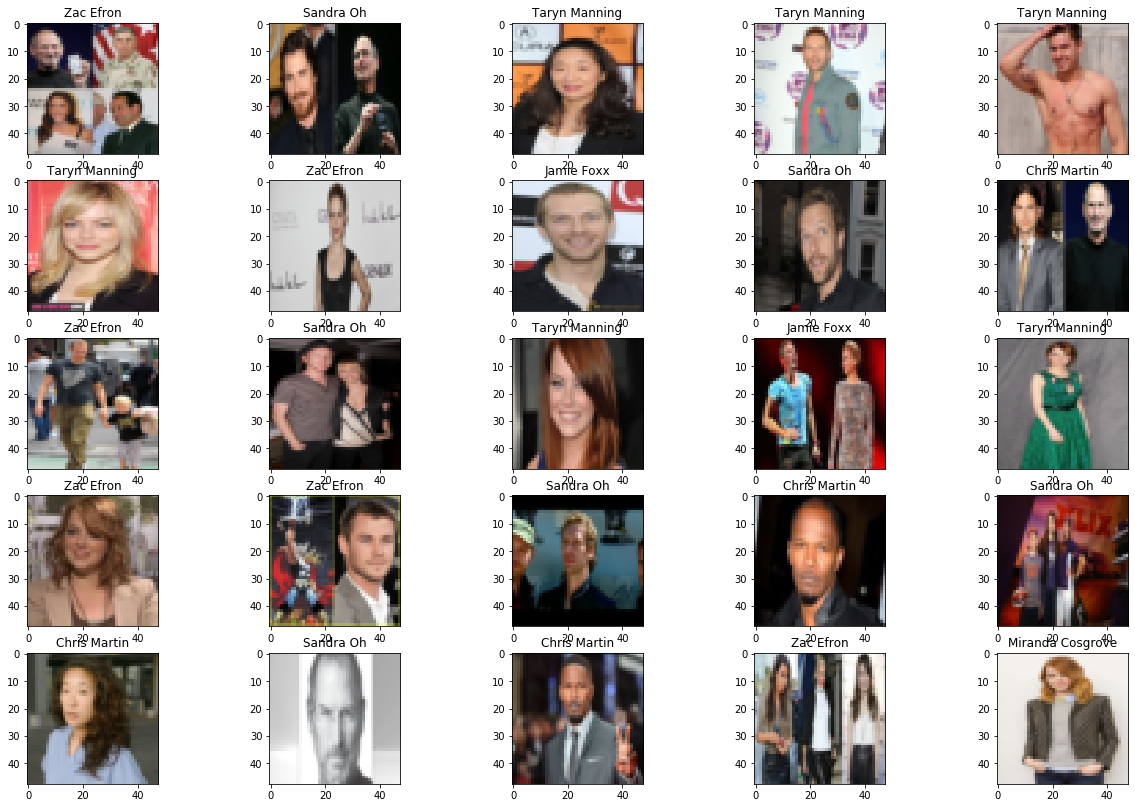

In [132]:
indices = (~(y_pred == y2_tmp)).nonzero()[0]
count = 0
nrows, ncols = 5, 5
fig, axes = plt.subplots(nrows, ncols, figsize=(21, 14))
for i in range(nrows):
    for j in range(nrows):
        img = x2[indices[count]]
        axes[i, j].imshow(img)
        axes[i, j].set_title(classes[y_pred[indices[count]]])
        count += 1